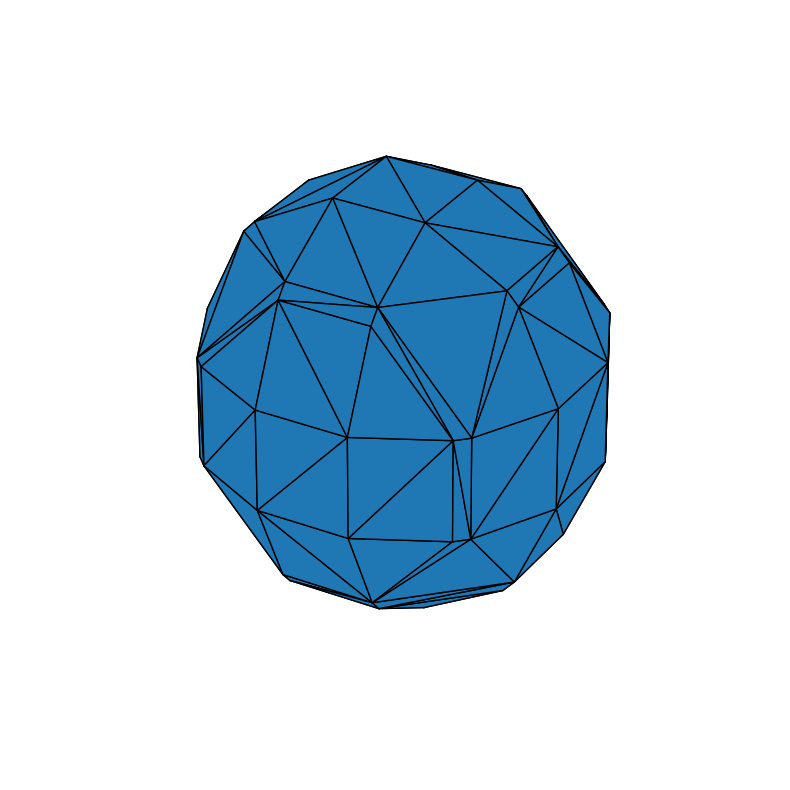

In [15]:
import numpy as np
from skimage.measure import marching_cubes, mesh_surface_area
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the grid
grid_size = 10
x = np.linspace(-3, 3, grid_size)
y = np.linspace(-3, 3, grid_size)
z = np.linspace(-3, 3, grid_size)
X, Y, Z = np.meshgrid(x, y, z)

# Define the scalar field f(x, y, z) = x^2 + y^2 + z^2 - 2
F = X**2 + Y**2 + Z**2 - 2

# Use marching cubes to extract the surface for isosurface = 0
verts, faces, normals, _ = marching_cubes(F, level=0, spacing=(x[1]-x[0], y[1]-y[0], z[1]-z[0]))

# Recenter vertices to the origin
verts = verts - verts.mean(axis=0)

# Plot the mesh
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a Poly3DCollection for visualization
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

# Adjust plot limits and aspect
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio

# Remove axes
ax.axis('off')

plt.show()

TypeError: Axes3D.add_collection3d() got an unexpected keyword argument 'color'

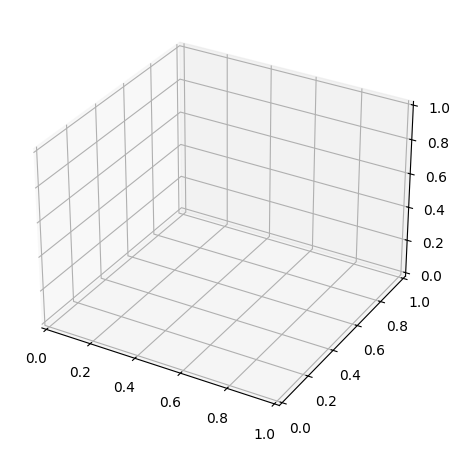

In [51]:
import numpy as np
from skimage.measure import marching_cubes, mesh_surface_area
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


def mesh(f, ax, grid_size):
    # Define the grid
    x = np.linspace(-3, 3, grid_size)
    y = np.linspace(-3, 3, grid_size)
    z = np.linspace(-3, 3, grid_size)
    X, Y, Z = np.meshgrid(x, y, z)

    # Define the scalar field f(x, y, z) = x^2 + y^2 + z^2 - 2
    F = f(X,Y,Z)

    # Use marching cubes to extract the surface for isosurface = 0
    verts, faces, normals, _ = marching_cubes(F, level=0, spacing=(x[1]-x[0], y[1]-y[0], z[1]-z[0]))

    # Recenter vertices to the origin
    verts = verts - verts.mean(axis=0)

    # Create a Poly3DCollection for visualization
    mesh = Poly3DCollection(verts[faces])
    mesh.set_edgecolor('k')
    ax.add_collection3d(mesh)

    # Adjust plot limits and aspect
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio

    # Remove axes
    ax.axis('off')

def f(x,y,z):
    return (x)**2+(y)**2-z**2-0.1

# Create subplots
fig = plt.figure(figsize=(12, 7))

# Plot marching cubes result for grid size = 10
ax2 = fig.add_subplot(121, projection='3d')
mesh(f,ax2, grid_size=10)
ax2.set_title("Grid size = 10", fontsize=20)

# Plot marching cubes result for grid size = 100
ax3 = fig.add_subplot(122, projection='3d')
mesh(f,ax3, grid_size=20)
ax3.set_title("Grid size = 20", fontsize=20)

# Show the plots
plt.tight_layout()
plt.savefig(fname="hourglass.png", dpi=500)
plt.show()